<a href="https://colab.research.google.com/github/JerryRaphy/FakeNewsDetection/blob/main/fake_news_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Datasets

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jeraldkannath","key":"5bbeaf919a0c897a11bd9df35734d771"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

 68% 28.0M/41.0M [00:00<00:00, 61.2MB/s]
100% 41.0M/41.0M [00:00<00:00, 103MB/s] 


In [ ]:
from zipfile import ZipFile
file_name = "fake-and-real-news-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()

In [ ]:
import pandas as pd

df_fake = pd.read_csv('Fake.csv')
df_fake.head(5)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_fake.shape

(23481, 4)

In [ ]:
# Appending Fake Labels '0' to the dataframe

import numpy as np

labels_fake = np.zeros(23481)
df_fake['labels'] = labels_fake

In [ ]:
df_fake.head(5)

,title,text,subject,date,labels
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0.0


In [ ]:

#Counting by Subjects 
subjects = []
values = []
for key,count in df_fake.subject.value_counts().iteritems():
    subjects.append(key)
    values.append(count)

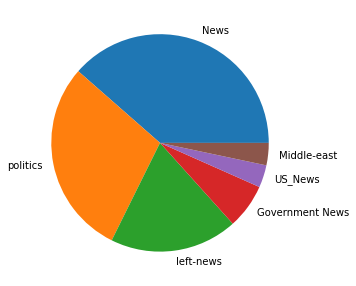

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
#sns.countplot("subject", data=df_fake)
plt.pie(values , labels = subjects)
plt.show()

In [ ]:
df_true = pd.read_csv('True.csv')

In [ ]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_true.shape

(21417, 4)

In [ ]:
labels_true = np.ones(21417)

In [ ]:
df_true['labels'] = labels_true
df_true.shape

(21417, 5)

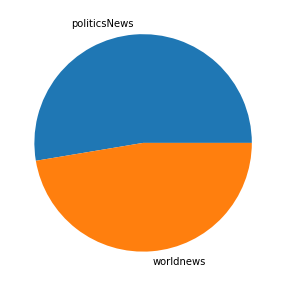

In [ ]:
#Counting by Subjects 
subjects = []
values = []
for key,count in df_true.subject.value_counts().iteritems():
    subjects.append(key)
    values.append(count)

plt.figure(figsize=(5,5))
#sns.countplot("subject", data=df_fake)
plt.pie(values , labels = subjects)
plt.show()


In [ ]:
# Appending the true reviews to the fake reviews

df_final = df_true.append(df_fake)

In [ ]:
df_final.shape

(44898, 5)

In [ ]:
# Randomizing the rows  

df = df_final.sample(frac = 1)

In [ ]:
df.head(10)

,title,text,subject,date,labels
11459,CNN Anchor Asks Van Jones To Take Back His Pra...,CNN commentator Van Jones stood by his praise ...,politics,"Mar 8, 2017",0.0
7303,Obama officials work against time to wrap bank...,WASHINGTON (Reuters) - U.S. officials are stri...,politicsNews,"November 13, 2016",1.0
17370,HOW A SINGLE FEDERAL BUREAUCRAT OPENED THE DOO...,Meet Alice Miller who single-handedly scr*wed ...,Government News,"May 6, 2015",0.0
13468,OBAMA AND HILLARY CLINTON-BACKED SYRIAN REBEL ...,Hillary Clinton and Obama decided it was a gre...,politics,"Jul 21, 2016",0.0
2321,Five Facts About The Obama Economy That Trump...,Trump likes to pretend he was handed a mess ...,News,"March 3, 2017",0.0
417,BREAKING: Under Trump’s Leadership FEMA Could...,"After Hurricane Harvey devastated Houston, Tex...",News,"September 7, 2017",0.0
7577,WATCH: Insider Reveals How Trump University S...,A former employee of Donald Trump s Trump Univ...,News,"March 10, 2016",0.0
350,Trump Just Became First President In Modern H...,Donald Trump has been fundraising like crazy f...,News,"September 19, 2017",0.0
14048,PANDERING HILLARY CLINTON Angers Prince Fans F...,Hillary has been pandering like crazy during t...,politics,"Apr 24, 2016",0.0
18960,YOU WON’T BELIEVE THIS: WATCH DONNA BRAZILE De...,"Well, first of all, I didn t have my hands in...",left-news,"Mar 17, 2017",0.0


In [ ]:
df.value_counts('labels')

labels
0.0    23481
1.0    21417
dtype: int64

Text Cleaning

In [ ]:
text = list(df['text'])

In [ ]:
# set of stopwords imported from https://gist.github.com/sebleier/554280
# removed nor,not
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [ ]:
from bs4 import BeautifulSoup
import string 
import re


def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not",phrase)
    phrase = re.sub(r"can\'t", "can not",phrase)
    phrase = re.sub(r"ain\'t", "is not",phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
import nltk
sno = nltk.stem.SnowballStemmer('english')

In [ ]:
pre_processed = []
import tqdm.notebook as tq

for sentence in tq.tqdm(text):
  sentence = re.sub(r"http\S+", "", sentence)
  sentence = BeautifulSoup(sentence, 'lxml').get_text()
  sentence = decontracted(sentence)
  sentence = re.sub(r'[^\w\s]', '', sentence)
  sentence = re.sub("\S*\d\S*", "", sentence).strip()
  sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)
  pre_processed.append(sentence)


In [ ]:
initial_processed = []
for sentence in tq.tqdm(pre_processed):
  filtered_sentence = []
  for word in sentence.split():
    word = word.lower()
    if(len(word)>2):
      if word not in stopwords:
        word = sno.stem(word)
        filtered_sentence.append(word)
  final_string = ' '.join(filtered_sentence)
  initial_processed.append(final_string)

In [ ]:
initial_processed[0]

'cnn comment van jone stood prais presid trump cnn new day wednesday trump joint address congress jone call moment speech extraordinari said trump becam presid unit state ask new day host alisyn camerota want amend comment jone decln opportun moment proud human still get tearyey even trump speech jone saidvia weasel zipper'

In [ ]:

initial_processed[0]
df['text'] = initial_processed
print(df['text'].values[0])

cnn comment van jone stood prais presid trump cnn new day wednesday trump joint address congress jone call moment speech extraordinari said trump becam presid unit state ask new day host alisyn camerota want amend comment jone decln opportun moment proud human still get tearyey even trump speech jone saidvia weasel zipper


In [ ]:
# Importing a few modules for bow

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
x = np.array(df['text'])
y = np.array(df['labels'])

In [ ]:
# Initialze to our count vecotorizer
count_vect = CountVectorizer(binary='True')


# x now contain our bow
x = count_vect.fit_transform(x) 


print(type(x)) #it is a sparse matrix
print(x.get_shape()) #shape of bow matrix

<class 'scipy.sparse.csr.csr_matrix'>
(44898, 170841)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

Now since we have our training and testing data we will now use different classifers and determine our best accuracy values

In [ ]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.9702672605790645


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.9629175946547884


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))


0.9985523385300669


So, it is evident that LogisticRegression gives the best accuracy of 99%